In [144]:
import math
from math import log2
from collections import Counter
from IPython.display import Image

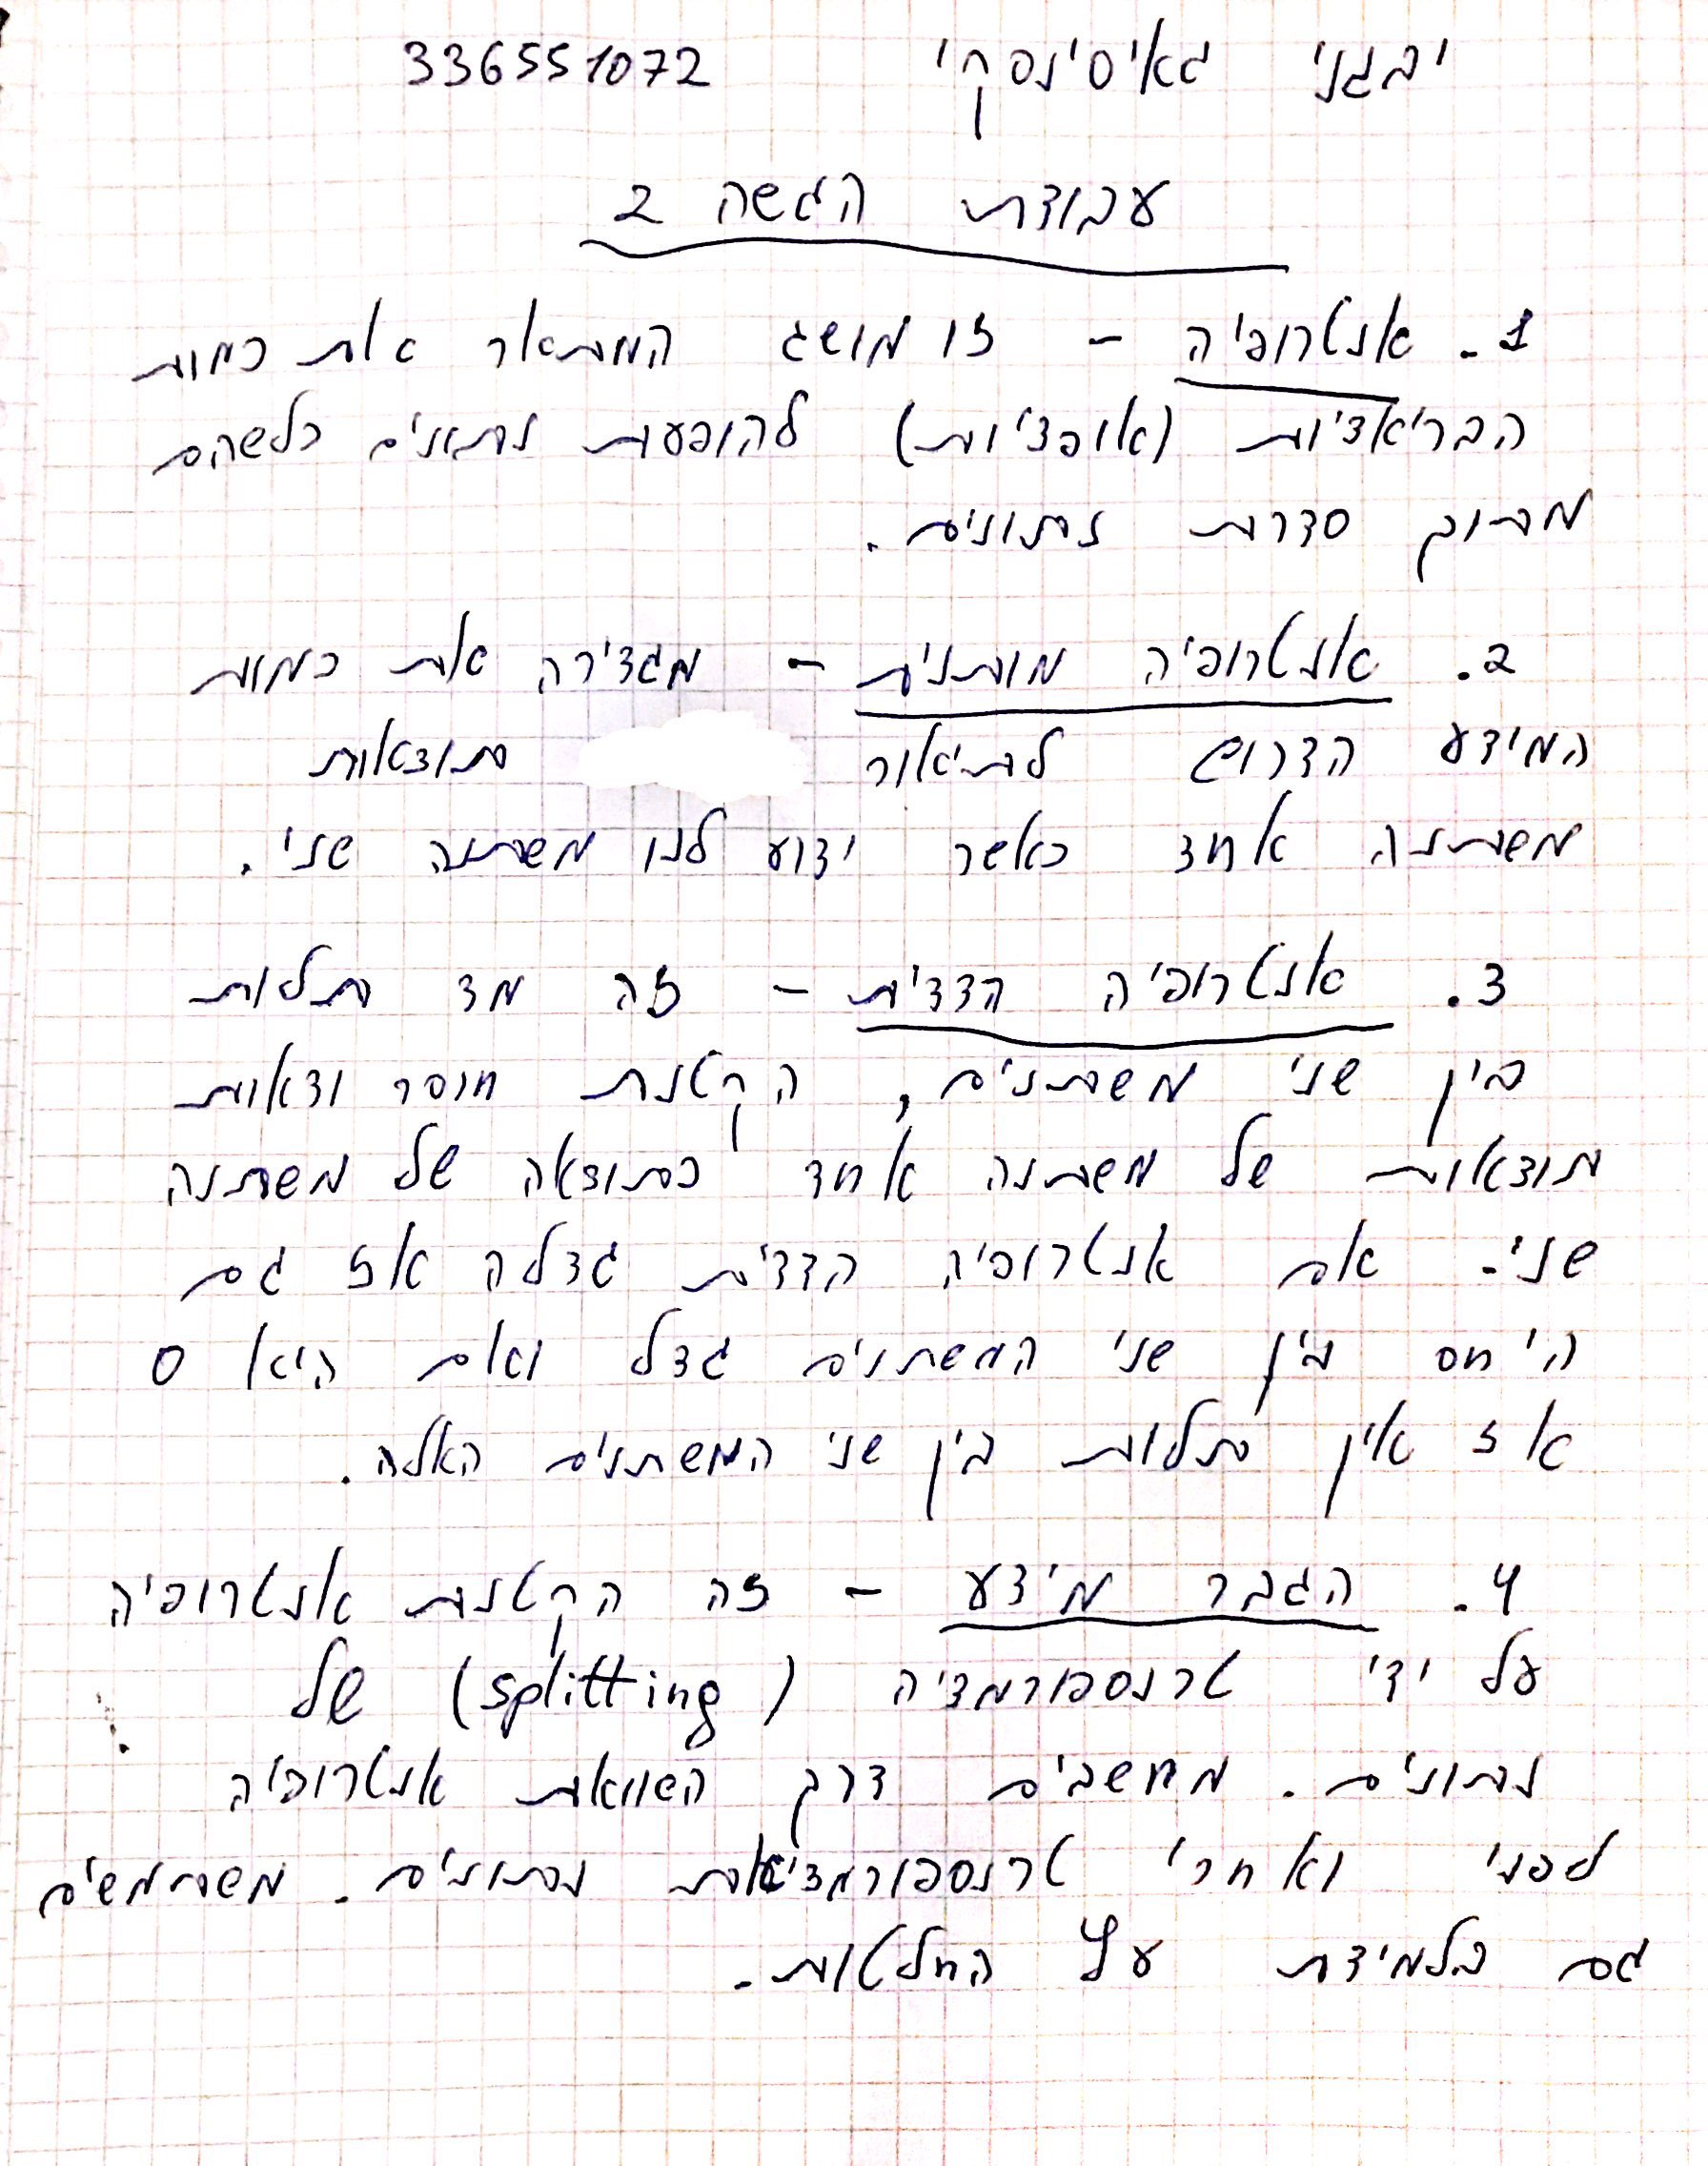

In [145]:
Image("Desktop\CamScanner 26-04-2020 18.15.02-1.jpg")

In [146]:
def myEntropy(arr):
    res = 0
    temp = []
    prob = []
    for i in arr:
        count = 0
        for j in arr:
            if i==j and i not in temp:
                count+=1
        prob.append(count/len(arr))  
        temp.append(i)

    for n in prob:
        if n!=0:
            res += n*log2(n)        
    res = res*(-1)  

    return res
myEntropy([1,2,3,8,1,3,2,1]) 

1.9056390622295665

In [147]:
from scipy.stats import entropy
entropy([0.375, 0.25, 0.25, 0.125], base=2)                                                                  #library

1.9056390622295665

In [148]:
import pyitlib
from pyitlib import discrete_random_variable as drv

In [149]:
def condEntropy(arr2, arr1):
    def indices(v,arr1):
        return [i for i, j in enumerate(arr1) if j == v]
    res = 0
    total = len(arr2)
    for label in Counter(arr1).keys():
        sv = [arr2[i] for i in indices(label,arr1)]
        entropy = myEntropy(sv)
        res += entropy * len(sv)/total
    return res  
condEntropy([1,2,1,2,2,1,2,1],[1,2,3,8,1,3,2,1])          

0.3443609377704336

In [150]:
print(drv.entropy_conditional([1,2,1,2,2,1,2,1],[1,2,3,8,1,3,2,1]))                         #library

0.34436093777043353


In [151]:
def mutualInfo(arr1, arr2):
   # I(X; Y ) = H(Y) − H(Y /X)
    #I(X ; Y) = H(X) – H(X | Y) 
 
    return myEntropy(arr2) - condEntropy(arr2,arr1)
mutualInfo([1,2,3,8,1,3,2,1],[1,0,1,0,0,1,0,1])

0.6556390622295665

In [152]:
drv.information_mutual([1,2,3,8,1,3,2,1],[1,0,1,0,0,1,0,1])                                 #library

0.6556390622295665

In [153]:
def infoGain(arr1, arr2):
    return (myEntropy(arr2)-mutualInfo(arr1,arr2))*condEntropy(arr1,arr2)
print(infoGain([1,2,3,8,1,3,2,1],[1,0,1,0,0,1,0,1]))

0.4304511722130419


In [154]:
from info_gain import info_gain
print(info_gain.info_gain([1,0,1,0,0,1,0,1], [1,2,3,8,1,3,2,1]))                           #library

0.4544543674493905
